In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import timeit
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# First scenario

This study intends to uncover some players' skills that have a high association with overall rating and group them into comparable groups based on these characteristics. What if we could group players with 5 or 6 skills together and predict their groups only based on these skills? The first problem we encountered was determining how many groups are eligible for clustering. I used the Kmeans machine learning algorithm and the elbow approach to find the optimal number of clusters for the dataset to achieve this requirement.


In [29]:
# connect to dataset
database = 'C:\\Users\\Lenovo\\Downloads\\datasets\\database.sqlite'
conn = sqlite3.connect(database)

In [77]:
# read data from dataset and introduce the dataframe
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [76]:
df.shape

(183978, 42)

In [78]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [79]:
df = df.dropna()

In [80]:
df.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [33]:
# I create a second data frame to split a small sample of data to analyse 
#and find the best model and accuracy due to my original datagram being huge
#and taking a long time to analyse every time
df2 = df2.copy(deep=True)
df2 = df2.drop(range(1,175000))
df2.shape

(8979, 42)

In [34]:
df2.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [35]:
df2 = df2.dropna()
df2.shape

(8777, 42)

In [36]:
# features that we selected to cluster our player based on it
fetures_selected = ["gk_kicking", 'potential', 'marking', 'standing_tackle', 'interceptions']
fetures_selected2 = ['potential','reactions',"gk_kicking",'standing_tackle',"vision"]
fetures_selected3 = ["potential","gk_kicking",'standing_tackle','ball_control','heading_accuracy' ]


In [37]:
target = df2["overall_rating"]
X = df2[fetures_selected].values
y = target

### Elbow Method 
in this method we can pich up the optimal number for k in the k-means which is really importance to reach a perfect model.

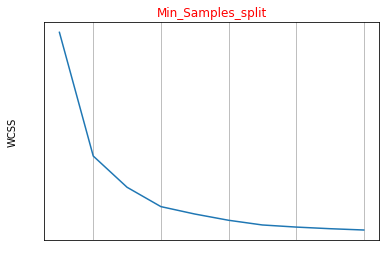

In [38]:
from sklearn.cluster import KMeans
#finding obtimising number for clustering
wcss = []

for i in range(1,11):

    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white')
plt.title("Min_Samples_split", color = "Red")
plt.grid(axis = 'x')
plt.xlabel('min_samples_split', color= "white")
plt.show()

In [39]:
# split our data to train and test by using sklearn.model_selection function
xtrain, xtest, ytrain, ytest  = train_test_split(X, y, test_size = 0.30, random_state = 49)
#Applying kmeans to the dataset / Creating the kmeans classifier
#kmeans_model = KMeans(n_clusters = 4, init = 'k-means++',).fit(xtrain)
kmeans_model = KMeans(n_clusters = 4, init = 'k-means++',)
kmeans_model.fit(X)
#y_kmeans = kmeans_model.fit_predict(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
y_labels_train = kmeans_model.labels_
y_labels_train

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
y_labels_test = kmeans_model.predict(xtest)
y_labels_test

array([0, 2, 0, ..., 2, 0, 2])

In [42]:
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

array([2, 2, 2, ..., 3, 3, 3])

In [43]:
pd.value_counts(kmeans_model.labels_, sort=False)

0     709
1    3284
2    3693
3    1091
dtype: int64

In [44]:
from sklearn.metrics import accuracy_score
score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
score

0.5452980813958629

[[56.48267898 76.61431871 27.60508083 30.34180139 61.63279446]
 [10.41897233 72.88801054 46.59683794 54.34387352 50.87351779]
 [ 9.77406417 74.72459893 24.31417112 26.79010695 42.81283422]
 [ 9.94871795 77.9653092  72.28657617 76.16138763 75.76923077]
 [54.0630137  71.09589041 58.98082192 60.76712329 57.43013699]
 [10.47629196 71.36600959 62.63026105 66.01971231 63.40916356]
 [69.64575646 80.38745387 70.50922509 72.62730627 72.45387454]
 [62.36510067 72.33422819 17.89127517 18.70872483 22.42550336]
 [11.05844156 73.4375     22.44642857 23.49675325 25.03003247]
 [10.76591577 75.61508325 31.93535749 39.02840353 35.23996082]]


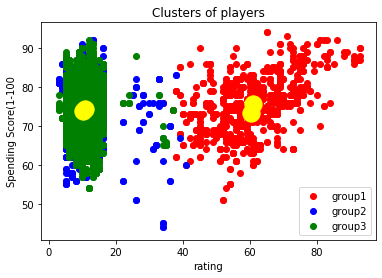

In [47]:
print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(X[y_kmeans   == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'group1')
plt.scatter(X[y_kmeans   == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'group2')
plt.scatter(X[y_kmeans   == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'group3')
#Visualising the clusters - On the first two columns
plt.legend()
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('rating')
plt.ylabel('Spending Score(1-100')
plt.show()
plt.show()

## implementing the Silhouette plot to analysis our model function

In [48]:
X_std = StandardScaler().fit_transform(X)

Time:  15.891299200000503


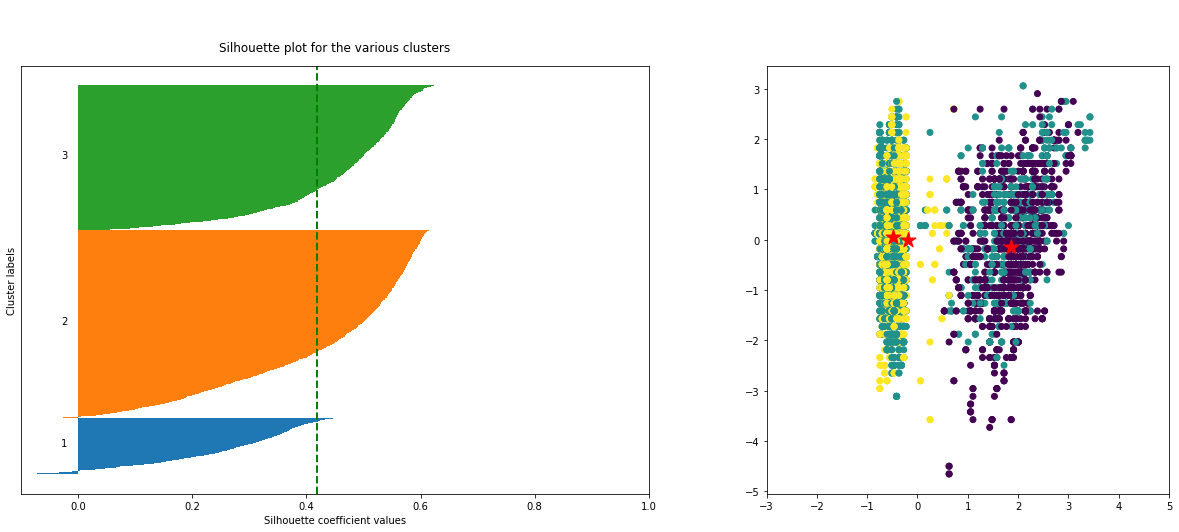

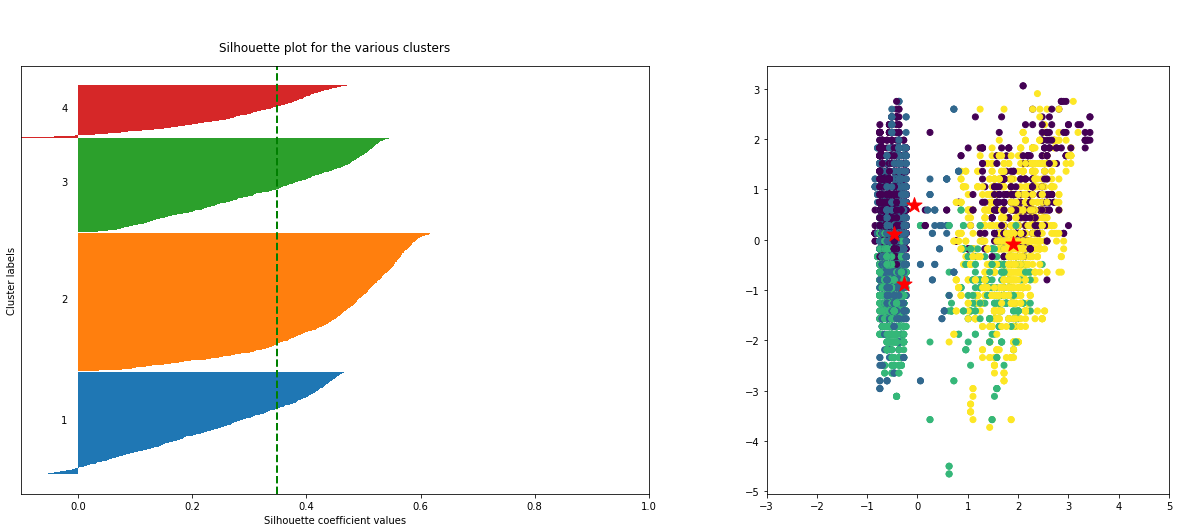

In [53]:
start = timeit.default_timer()
for i, k in enumerate([ 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-3,5])
    ax2.set_xlim([-3,5])
    ax2.set_xlabel('features scatter', color ='white')
    ax2.set_ylabel('features scatter', color ='white')
    ax2.set_title('Visualization of clustered data', y=1.02,  color ='white')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05, color ='white');
    stop = timeit.default_timer()
print('Time: ', stop - start)  

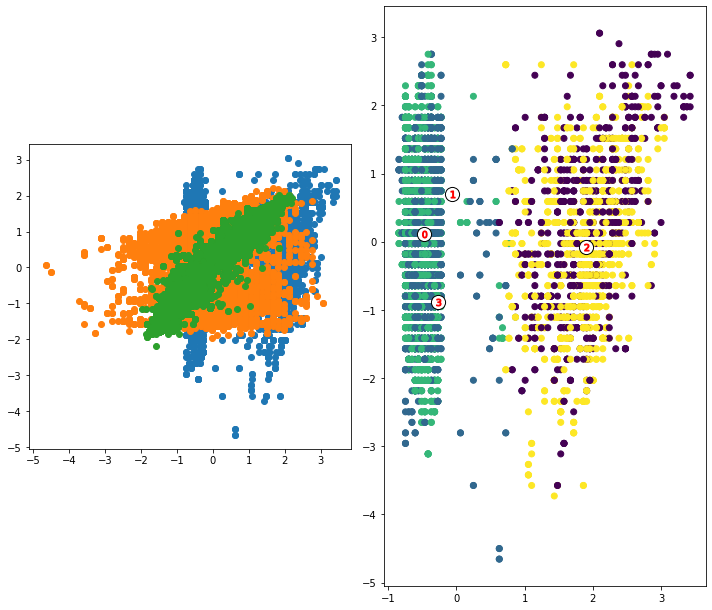

In [64]:
# Run kmeans
km = kmeans_model
km.fit(X_std)
labels = y_kmeans
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_std[:, 0], X_std[:, 1])
ax[0].scatter(X_std[:, 1], X_std[:, 2])
ax[0].scatter(X_std[:, 2], X_std[:, 3])
ax[0].set_aspect('equal')
ax[1].scatter(X_std[:, 0], X_std[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
               c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()

# implement with whole dataset 

In [84]:
target = df["overall_rating"]
X2 = df[fetures_selected].values
y2 = target

In [85]:
X2.shape

(180354, 5)

In [86]:
kmeans_model2 = KMeans(n_clusters = 4, init = 'k-means++',)
kmeans_model.fit(X2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
X_std2 = StandardScaler().fit_transform(X2)

Time:  1173.7388081999998


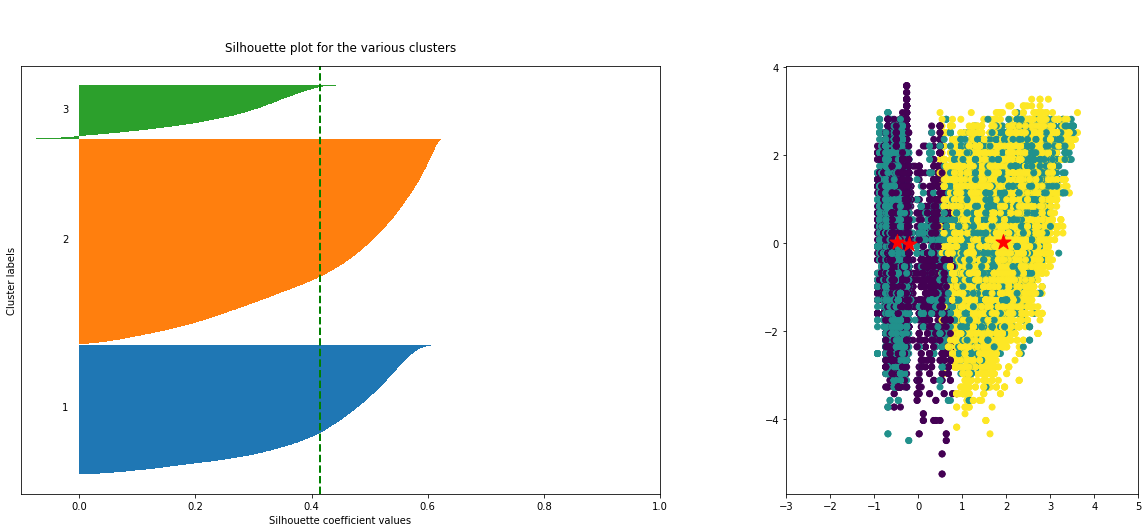

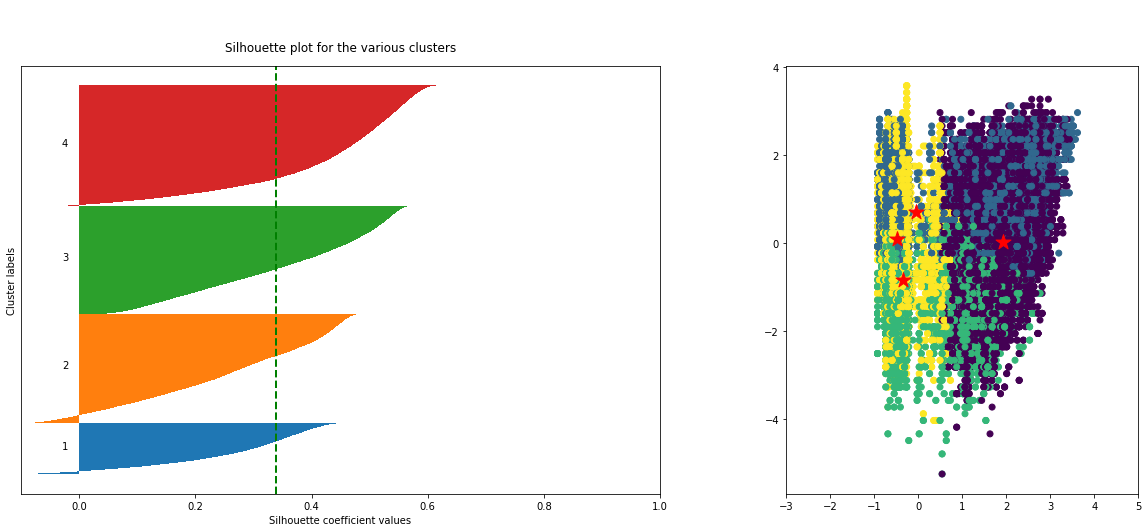

In [91]:
start = timeit.default_timer()
for i, k in enumerate([ 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std2)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std2, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std2[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-1,3])
    ax2.set_xlim([-1,3])
    ax2.set_xlabel('features scatter', color ='white')
    ax2.set_ylabel('features scatter', color ='white')
    ax2.set_title('Visualization of clustered data', y=1.02,  color ='white')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05, color ='white');
    stop = timeit.default_timer()
print('Time: ', stop - start)  

ValueError: 'c' argument has 8777 elements, which is not acceptable for use with 'x' with size 180354, 'y' with size 180354.

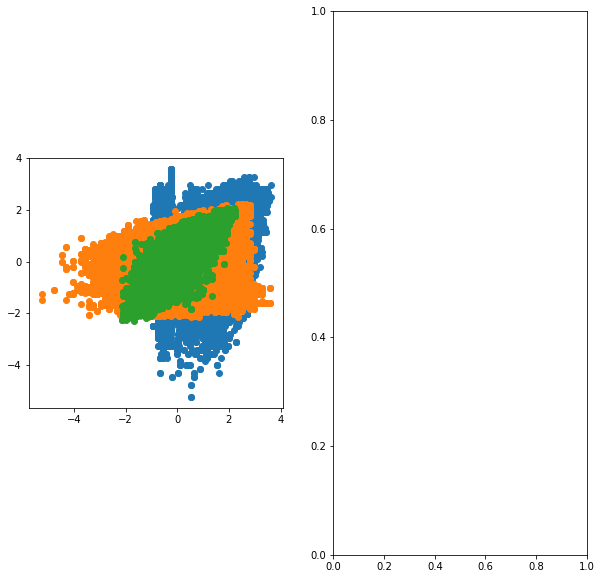

In [94]:
# Run kmeans
km = kmeans_model
km.fit(X_std2)
labels = y_kmeans
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_std2[:, 0], X_std2[:, 1])
ax[0].scatter(X_std2[:, 1], X_std2[:, 2])
ax[0].scatter(X_std2[:, 2], X_std2[:, 3])
ax[0].set_aspect('equal')
ax[1].scatter(X_std2[:, 0], X_std2[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
               c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()